In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)
import numpy as np
from sklearn.preprocessing import LabelEncoder
import collections
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [2]:
data = pd.read_csv("Company_Data.csv")

In [3]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
data.shape

(400, 11)

In [5]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [8]:
data["sales"]="<=7.49"
data.loc[data["Sales"]>=7.49,"sales"]=">=7.49"
y=data["Sales"]
x=data.drop(["Sales"],axis=1,inplace=True)

In [9]:
data.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,Bad,42,17,Yes,Yes,>=7.49
1,111,48,16,260,83,Good,65,10,Yes,Yes,>=7.49
2,113,35,10,269,80,Medium,59,12,Yes,Yes,>=7.49
3,117,100,4,466,97,Medium,55,14,Yes,Yes,<=7.49
4,141,64,3,340,128,Bad,38,13,Yes,No,<=7.49


In [10]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
for column_name in data.columns:
    if data[column_name].dtype == object:
        data[column_name] = le.fit_transform(data[column_name])
    else:
        pass

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   CompPrice    400 non-null    int64
 1   Income       400 non-null    int64
 2   Advertising  400 non-null    int64
 3   Population   400 non-null    int64
 4   Price        400 non-null    int64
 5   ShelveLoc    400 non-null    int32
 6   Age          400 non-null    int64
 7   Education    400 non-null    int64
 8   Urban        400 non-null    int32
 9   US           400 non-null    int32
 10  sales        400 non-null    int32
dtypes: int32(4), int64(7)
memory usage: 28.2 KB


In [12]:

#Splitting the data into input and output
featues = data.iloc[:,0:10]
labels = data.iloc[:,10]

# Now we perform some basic EDA on this dataset. Let’s check the correlation of all the features with each other

<AxesSubplot:>

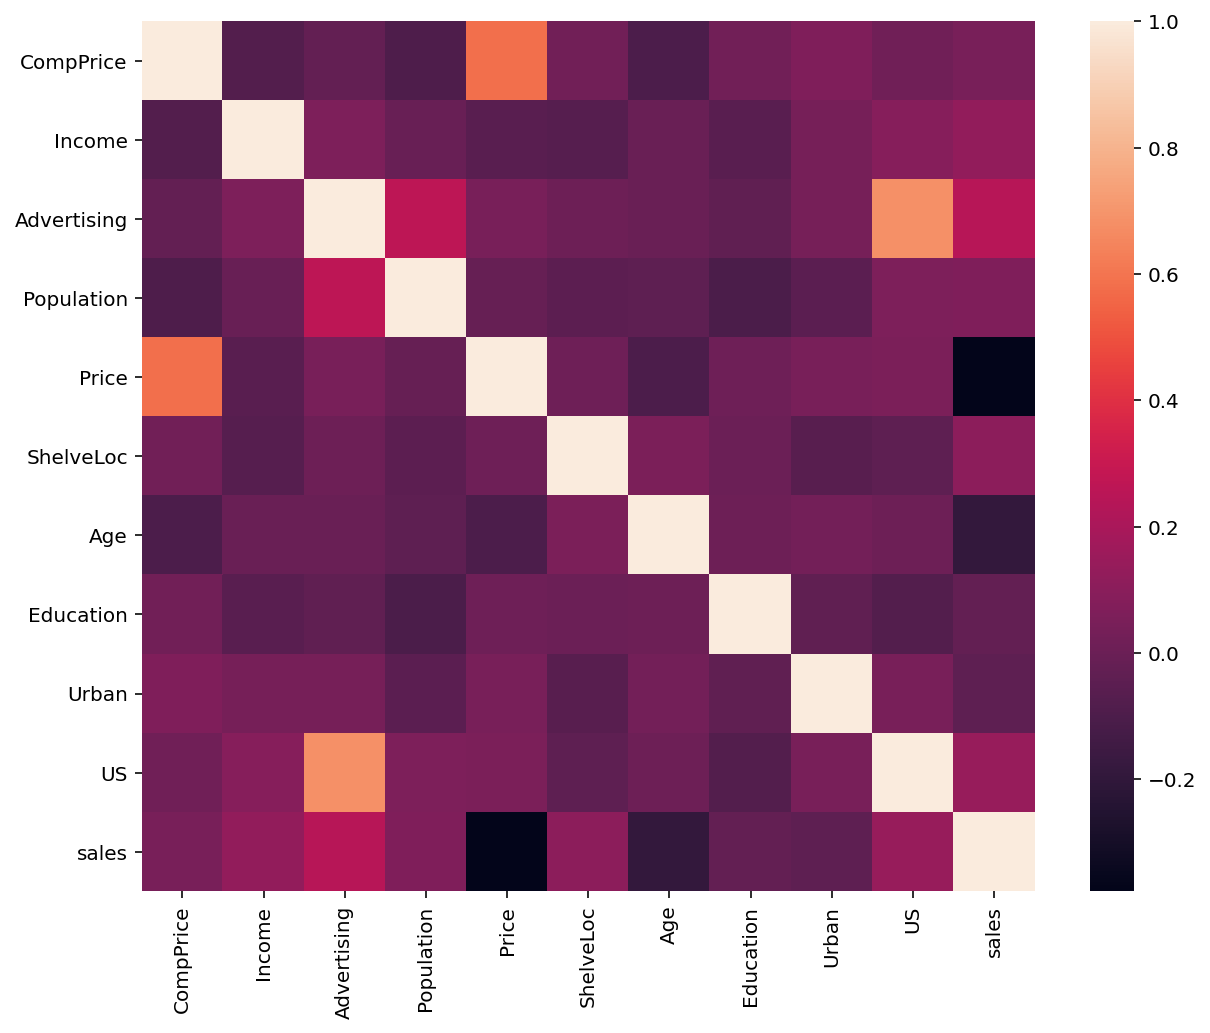

In [13]:
# correlation matrix
import seaborn as sns

sns.heatmap(data.corr())

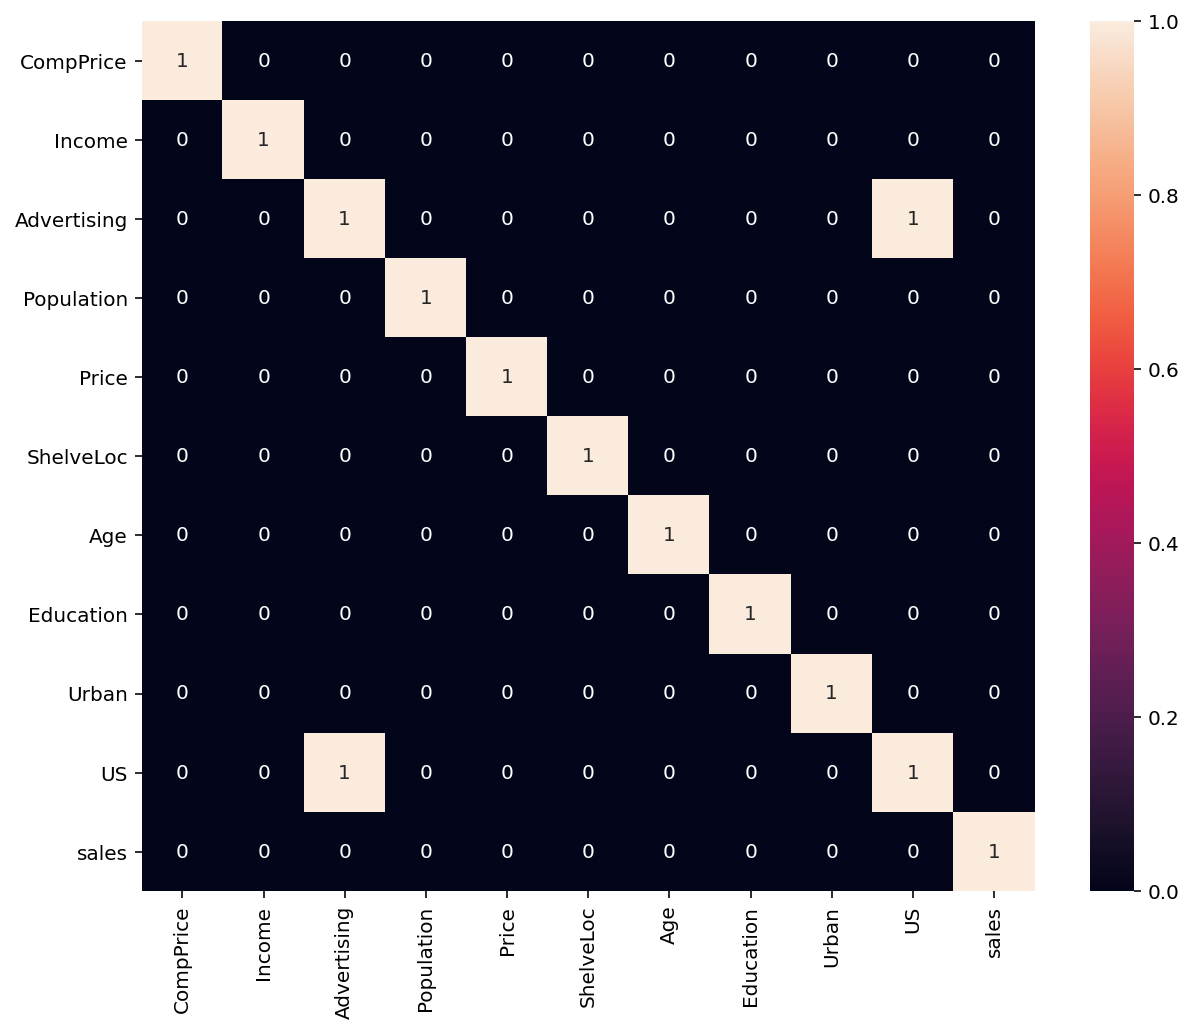

In [14]:
import seaborn as sns
sns.heatmap(data.corr()>0.6, annot = True)
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(featues,labels,test_size = 0.2,stratify = labels)

In [16]:

model=tree.DecisionTreeClassifier(random_state=1, max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

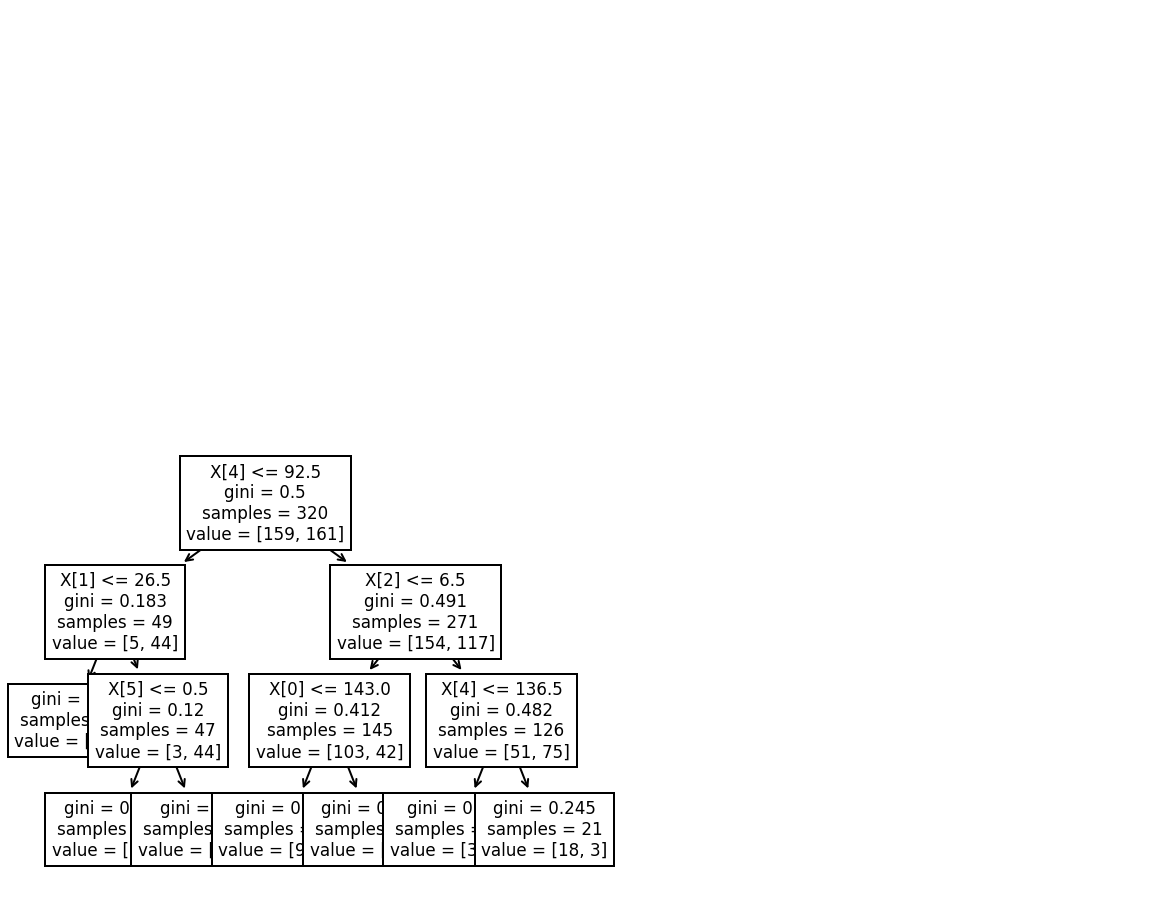

In [17]:
#PLot the decision tree
tree.plot_tree(model);

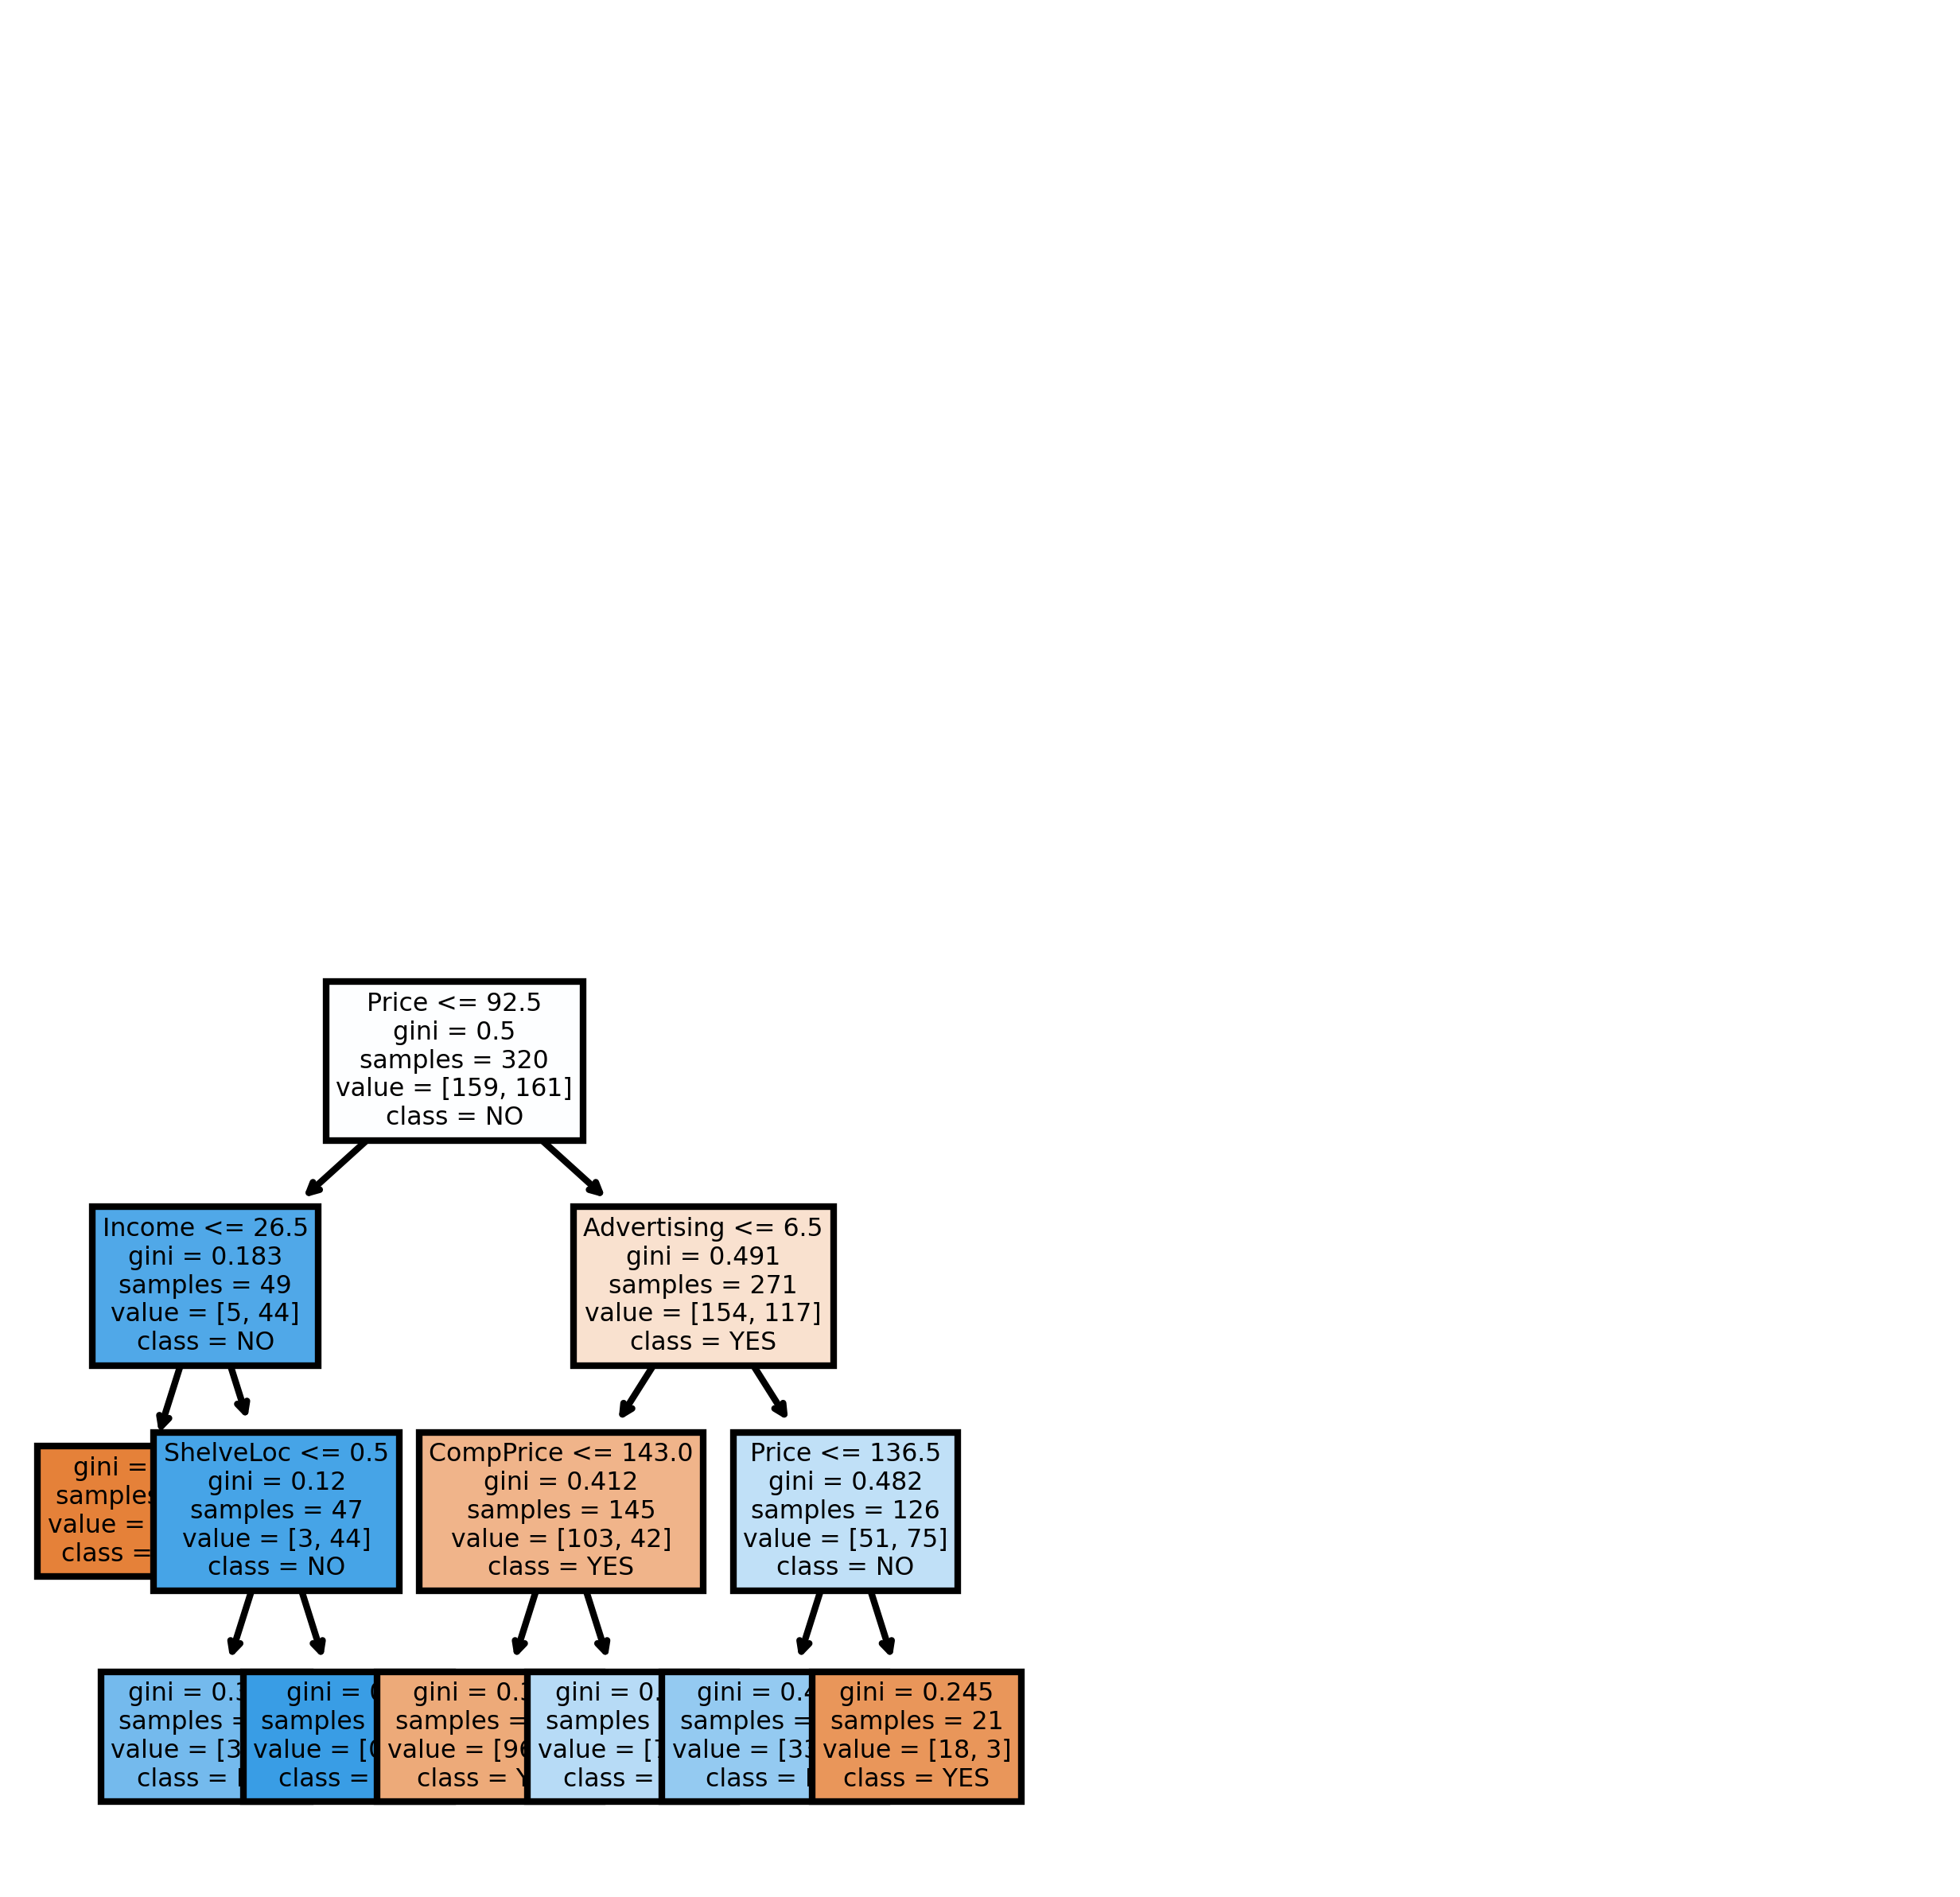

In [18]:
fn=['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','US','income']
cn=['YES','NO']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [19]:
model.fit(x_train, y_train)
model.score(x_train, y_train)

0.759375

In [20]:
model.score(x_test, y_test)

0.7

In [21]:
model.feature_importances_

array([0.08570528, 0.06785304, 0.25407113, 0.        , 0.57215861,
       0.02021195, 0.        , 0.        , 0.        , 0.        ])

In [22]:
y_pred = model.predict(x_test)

In [23]:
#Here first column is for 'Good', & second is for 'Risky'
model.predict_proba(x_test)

array([[0.85714286, 0.14285714],
       [0.38888889, 0.61111111],
       [0.        , 1.        ],
       [0.75590551, 0.24409449],
       [0.85714286, 0.14285714],
       [0.75590551, 0.24409449],
       [0.75590551, 0.24409449],
       [0.31428571, 0.68571429],
       [0.75590551, 0.24409449],
       [0.        , 1.        ],
       [0.31428571, 0.68571429],
       [0.75590551, 0.24409449],
       [0.85714286, 0.14285714],
       [0.31428571, 0.68571429],
       [1.        , 0.        ],
       [0.75590551, 0.24409449],
       [0.75590551, 0.24409449],
       [0.38888889, 0.61111111],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.75590551, 0.24409449],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.75590551, 0.24409449],
       [0.31428571, 0.68571429],
       [0.75590551, 0.24409449],
       [0.85714286, 0.14285714],
       [0.23076923, 0.76923077],
       [0.23076923, 0.76923077],
       [0.        , 1.        ],
       [0.

In [24]:

# confusion matrix

from sklearn.metrics import confusion_matrix, classification_report
cm= confusion_matrix(y_test, y_pred) 
cm

array([[26, 14],
       [10, 30]], dtype=int64)

Text(0.5, 1.0, 'Accuracy Score: 0.7')

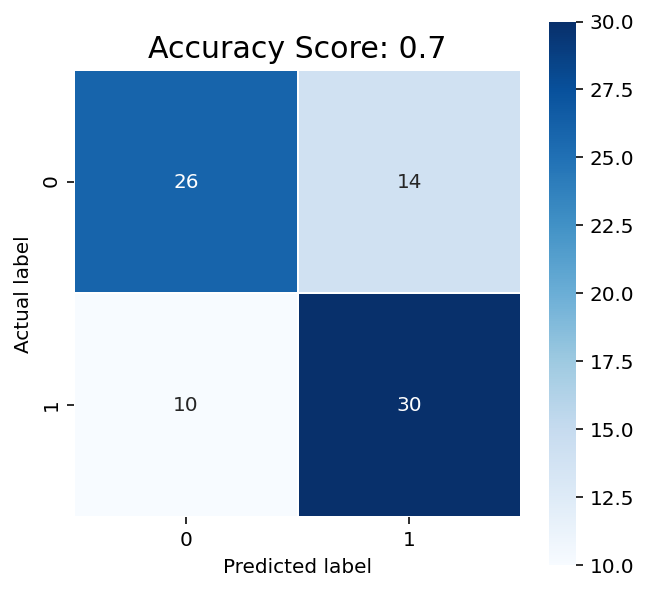

In [25]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(model.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

In [26]:
# Predicting the values of test data
y_pred = model.predict(x_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.72      0.65      0.68        40
           1       0.68      0.75      0.71        40

    accuracy                           0.70        80
   macro avg       0.70      0.70      0.70        80
weighted avg       0.70      0.70      0.70        80



We got an accuracy of 100% on the testing dataset records

In [27]:
train_accuracy = []
test_accuracy = []
for max_depth in range(1,11):
    model = DecisionTreeClassifier(criterion='entropy', max_depth= max_depth, random_state= 10)
    model.fit(x_train, y_train)
    train_accuracy.append(model.score(x_train, y_train))
    test_accuracy.append(model.score(x_test, y_test))

In [28]:
data = pd.DataFrame({'max_depth':range(1,11),'train_acc':train_accuracy, 'test_acc':test_accuracy})
data

,max_depth,train_acc,test_acc
0,1,0.618750,0.5875
1,2,0.625000,0.7000
2,3,0.740625,0.7000
3,4,0.771875,0.6875
4,5,0.865625,0.7375
5,6,0.881250,0.7375
6,7,0.906250,0.7500
7,8,0.940625,0.7750
8,9,0.956250,0.7750
9,10,0.968750,0.7500


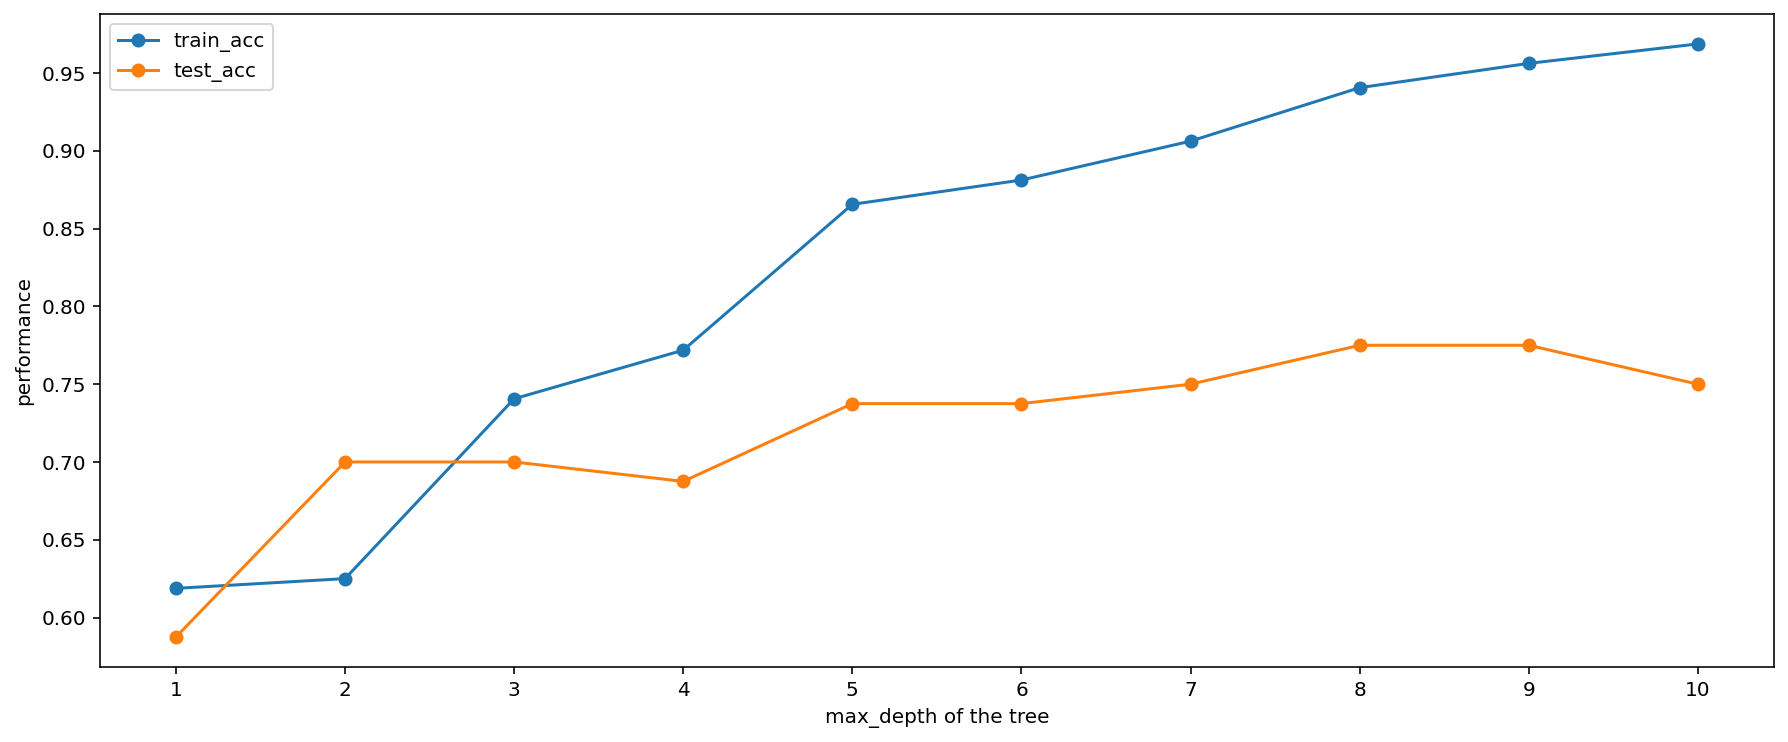

In [29]:
# visulizing accuracy graph to look over max_depth
labels =['train_acc','test_acc']
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot()
plt.plot(data['max_depth'],data['train_acc'], marker = 'o')
plt.plot(data['max_depth'], data['test_acc'], marker = 'o')
ax.set_xticks(np.arange(1,11))
plt.legend(labels)
plt.xlabel('max_depth of the tree')
plt.ylabel('performance')
plt.show()